In [46]:
# importing libraries 
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import plot_model

In [6]:
# MNIST dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


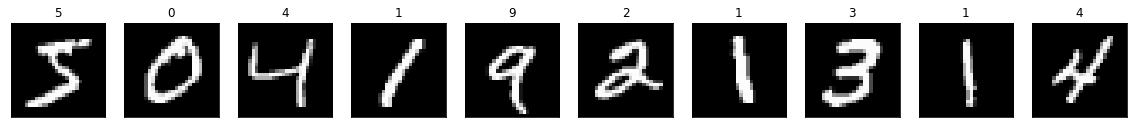

In [7]:
fig, axes = plt.subplots(ncols = 10,sharex = False,sharey = True, figsize = (20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i],cmap = 'gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [12]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

In [13]:
Y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
# MOdel Building

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

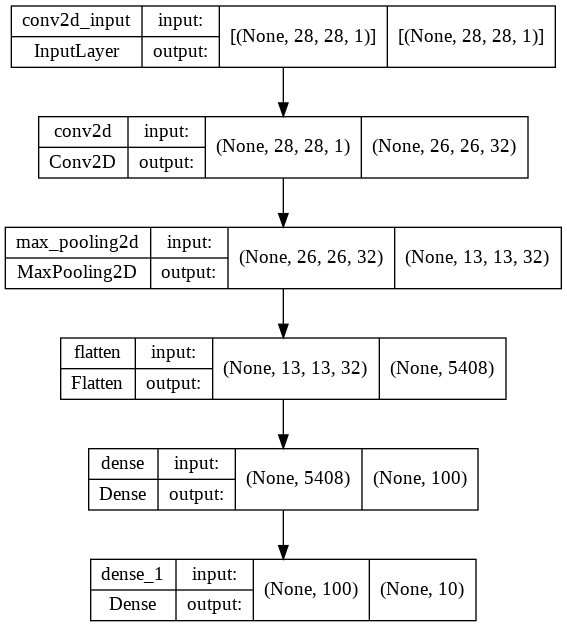

In [23]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [26]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 32, epochs = 2 , verbose = 1 , validation_data = ((X_test,Y_test)))

Epoch 1/2
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1258 - accuracy: 0.9617 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 2/2
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0498 - val_accuracy: 0.9850


In [30]:
model.save('mnist_cnn_model.h1')

INFO:tensorflow:Assets written to: mnist_cnn_model.h1/assets


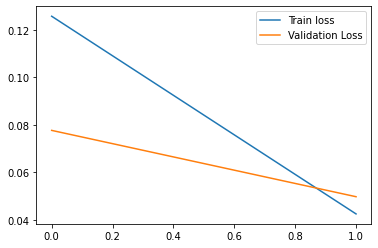

In [37]:
plt.plot(model.history.history['loss'],label = 'Train loss')
plt.plot(model.history.history['val_loss'],label = 'Validation Loss')
plt.legend()

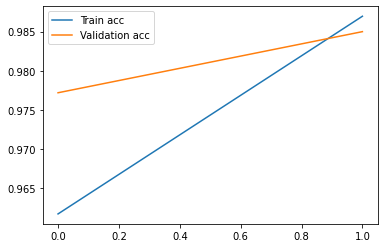

In [38]:
plt.plot(model.history.history['accuracy'],label = 'Train acc')
plt.plot(model.history.history['val_accuracy'],label = 'Validation acc')
plt.legend()

In [48]:
model = keras.models.load_model('mnist_cnn_model.h1')

In [ ]:
plt.imshow(X_test[1], cmap = 'gray')

In [55]:
x = np.reshape(X_test[2],(1,28,28,1))
np.argmax(model.predict(x))

1